<a href="https://colab.research.google.com/github/Pataweepr/ComEngMath2/blob/master/(ComEngMath2)FFT_test_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install soundfile

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')
!unzip '/content/gdrive/My Drive/ComEngMath2_data.zip'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/
Archive:  /content/gdrive/My Drive/ComEngMath2_data.zip
   creating: ComEngMath2_data/
  inflating: ComEngMath2_data/.DS_Store  
  inflating: __MACOSX/ComEngMath2_data/._.DS_Store  
   creating: ComEngMath2_data/ComEngMath2_figure/
   creating: ComEngMath2_data/ComEngMath2_sound/
  inflating: ComEngMath2_data/ComEngMath2_figure/.DS_Store  
  inflating: __MACOSX/ComEngMath2_data/ComEngMath2_figure/._.DS_Store  
  inflating: ComEngMath2_data/ComEngMath2_figure

In [3]:
import numpy as np
import pandas as pd
from scipy import signal,fftpack
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

In [4]:
N=10001
Nf = 3 # Nf--> num freq
t= np.arange(N,dtype=float)
# pick rand period betwwen 10-2010 and convert to freq
Ts = np.random.rand(Nf)*2000+10
fs=1/Ts
# pick rand Amp and phase
amp = np.random.rand(Nf)*200+ 100
phi = np.random.rand(Nf)*2*np.pi

h= np.zeros(N)
for i in range(len(fs)):
    h += amp[i]*np.sin(2*np.pi*fs[i]*t + phi[i])

h_w_noise = h + np.random.randn(N)*3*h + np.random.randn(N)*700

In [5]:
print(fs)

[0.00108153 0.00068881 0.01052963]


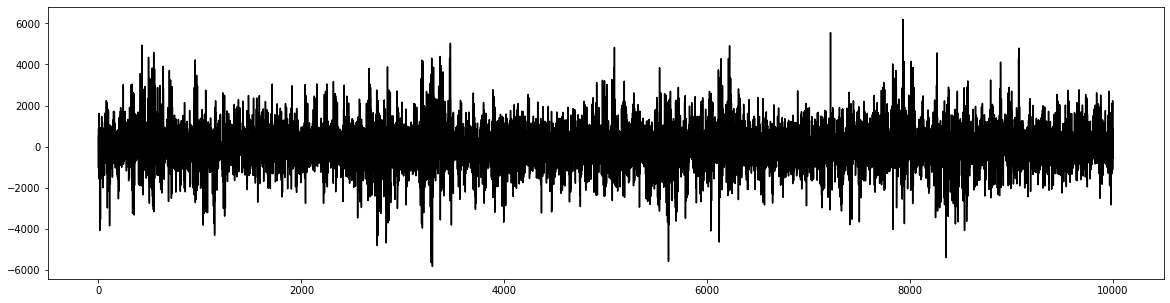

In [6]:
plt.figure(figsize=(20, 5))
plt.plot(t,h_w_noise,'k',label='Signal')
plt.show()

In [7]:
Hn = np.fft.fft(h_w_noise)
Hn

array([ 89184.73533877-1.45519152e-11j, 157406.17807875+3.04124060e+04j,
       120690.82264961-1.32501410e+04j, ...,
        90948.20692226-4.40696815e+04j, 120690.82264961+1.32501410e+04j,
       157406.17807875-3.04124060e+04j])

In [8]:
freq = np.fft.fftfreq(N) # first values -- off-set
print(freq)
print(len(freq))

[ 0.00000000e+00  9.99900010e-05  1.99980002e-04 ... -2.99970003e-04
 -1.99980002e-04 -9.99900010e-05]
10001


In [9]:
ind_freq = np.arange(1,N//2+1)
freq_pos =  freq[ind_freq]
print(freq_pos)
freq_neg = freq[-ind_freq]
print(freq_neg)

[9.99900010e-05 1.99980002e-04 2.99970003e-04 ... 4.99750025e-01
 4.99850015e-01 4.99950005e-01]
[-9.99900010e-05 -1.99980002e-04 -2.99970003e-04 ... -4.99750025e-01
 -4.99850015e-01 -4.99950005e-01]


In [10]:
psd =  np.abs(Hn[ind_freq])**2 + np.abs(Hn[-ind_freq])**2 # power spec density 
print(psd)

[5.14032387e+10 2.94836818e+10 2.04274263e+10 ... 1.39925223e+10
 1.30209785e+10 5.86076013e+09]


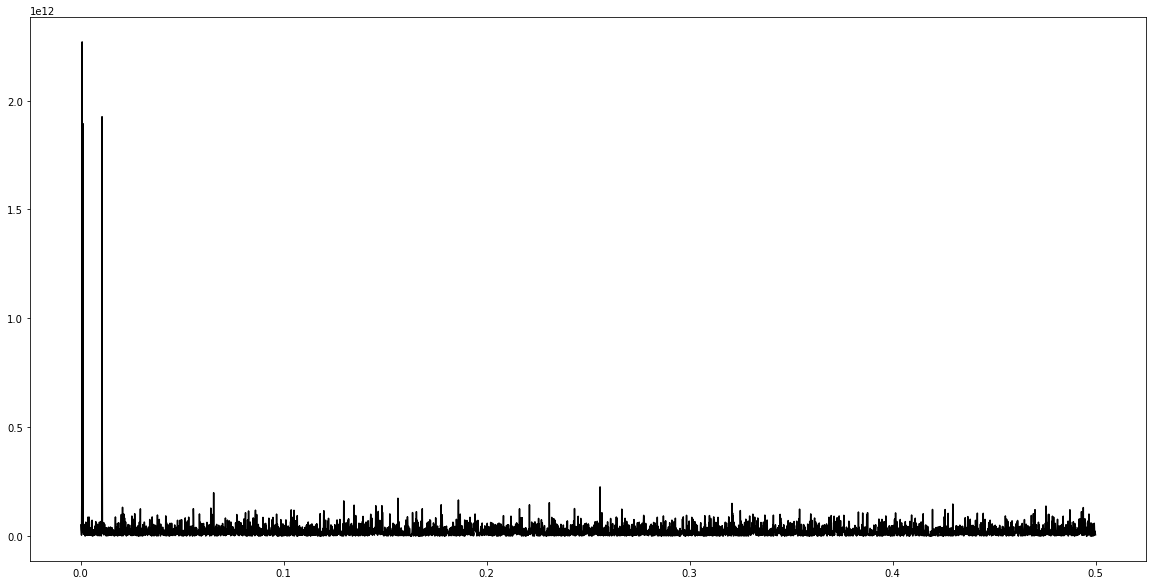

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(freq[ind_freq],psd,'k-')
plt.show()

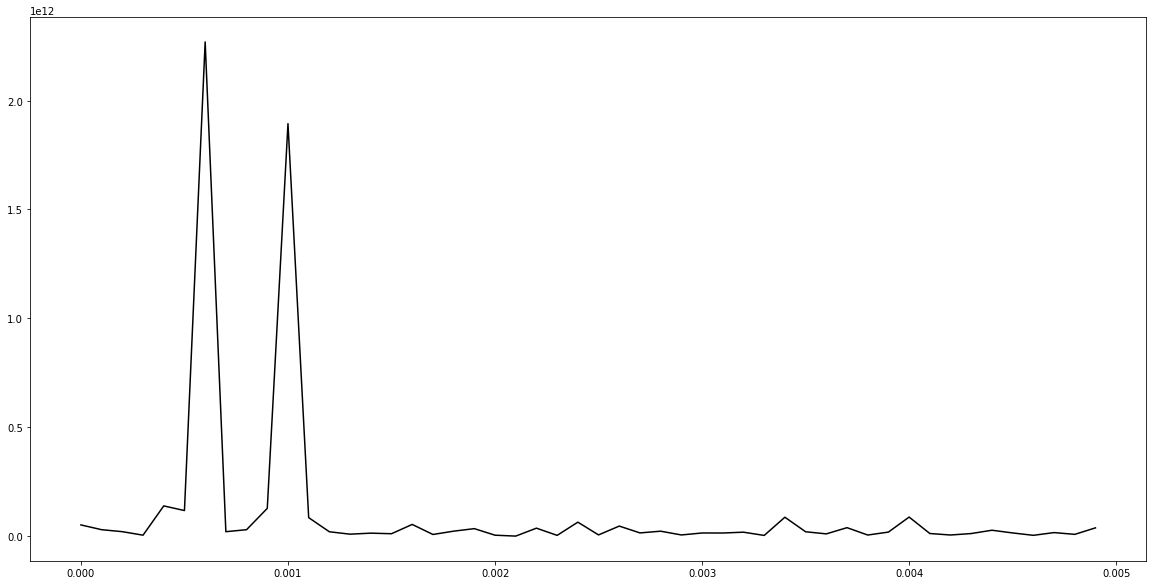

In [12]:
zoom_ind = 50
plt.figure(figsize=(20, 10))
plt.plot(freq[:zoom_ind],psd[:zoom_ind],'k-')
plt.show()

In [13]:
idx_sel = np.where(psd>0.4e12)
idx_sel

(array([  6,  10, 104, 105]),)

In [14]:
Hn_cut = np.zeros_like(Hn)
Hn_cut[ind_freq[idx_sel]] = Hn[ind_freq[idx_sel]]
Hn_cut[-ind_freq[idx_sel]] = Hn[-ind_freq[idx_sel]]

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


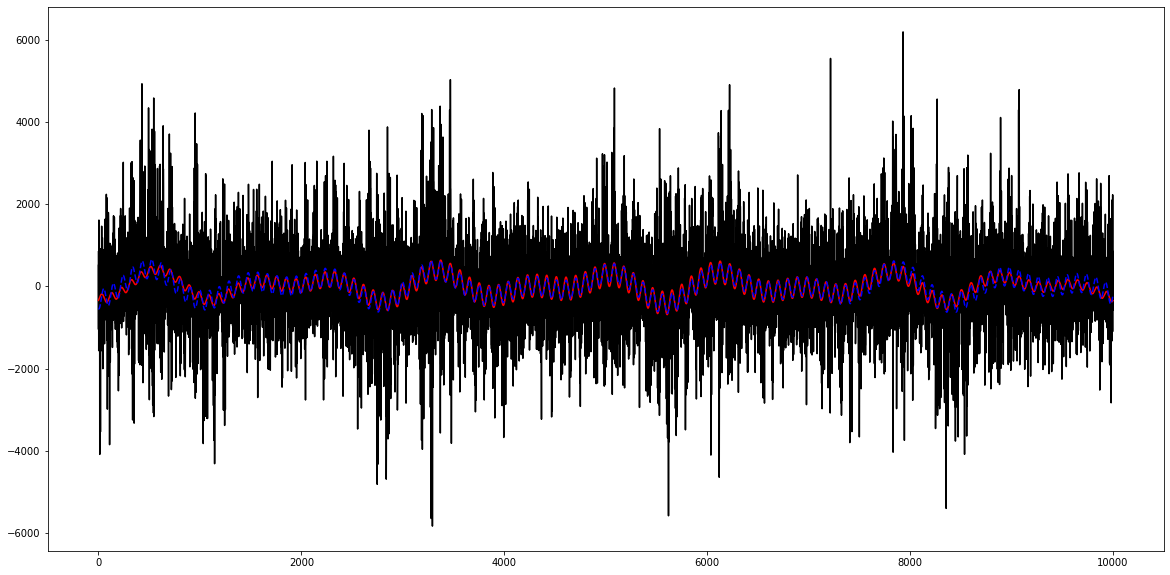

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(t,h_w_noise,'k',label='Signal')
plt.plot(t,np.fft.ifft(Hn_cut),'r-',label='filter')
plt.plot(t,h,'b--',label='clean_signal')
plt.show()

In [16]:
print(freq_pos[idx_sel])
print(fs)

[0.00069993 0.00109989 0.01049895 0.01059894]
[0.00108153 0.00068881 0.01052963]


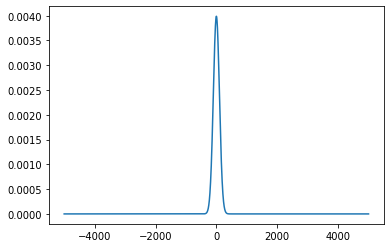

In [17]:
# conv with gussian
sigma = 100.
tt = np.arange(-N//2,N//2)
g = np.exp(-tt**2/2/sigma**2)/np.sqrt(2*np.pi)/sigma
plt.plot(tt,g)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


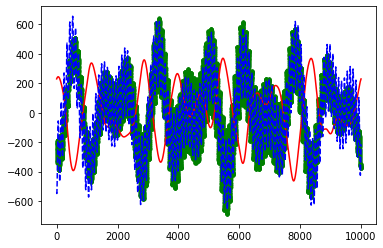

In [18]:
G = np.fft.fft(g)
HG = Hn*G 

# plt.plot(t,h_w_noise,'k',label='Signal')
plt.plot(t,np.fft.ifft(Hn_cut),'g.',label='cut')
plt.plot(t,np.fft.ifft(HG),'r-',label='g_filter')
plt.plot(t,h,'b--',label='clean_signal')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


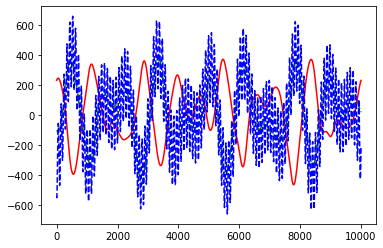

In [19]:
hn_smooth2 = np.convolve(h_w_noise,g)

plt.plot(t,hn_smooth2[N//2:3*N//2],'g-.',label='g_filter1')
plt.plot(t,np.fft.ifft(HG),'r-',label='g_filter2')
plt.plot(t,h,'b--',label='clean_signal')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


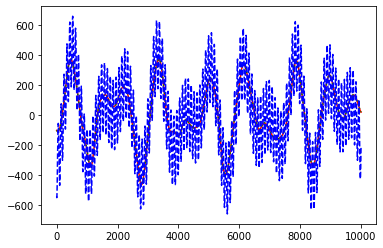

In [20]:
hz = np.zeros(2*N)
hz[N:2*N] = h_w_noise
Hz = np.fft.fft(hz)
tt = np.arange(-N,N)
g = np.exp(-tt**2/2/sigma**2)/np.sqrt(2*np.pi)/sigma
G = np.fft.fft(g)
HzG = Hz*G 
hz_new = np.fft.ifft(HzG)


plt.plot(t,hz_new[:N],'r-',label='g_filter2')
plt.plot(t,hn_smooth2[N//2:3*N//2],'g:',label='g_filter1')
plt.plot(t,h,'b--',label='clean_signal')

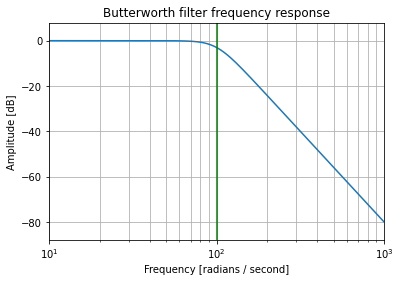

In [23]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

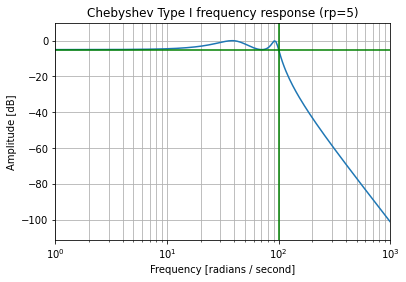

In [24]:
b, a = signal.cheby1(4, 5, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type I frequency response (rp=5)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()

In [25]:
b,a

(array([8500692.02673987]),
 array([1.00000000e+00, 4.17405778e+01, 1.08711379e+04, 2.80480674e+05,
        1.51166056e+07]))

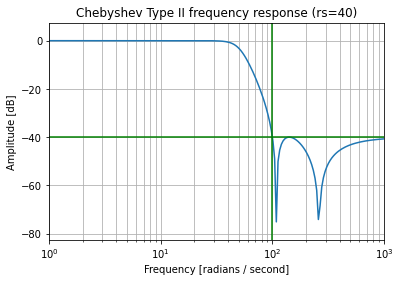

In [26]:
b, a = signal.cheby2(4, 40, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type II frequency response (rs=40)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-40, color='green') # rs
plt.show()

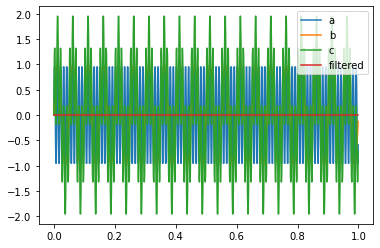

In [27]:
fs = 1000  # Sampling frequency
# Generate the time vector properly
t = np.arange(1000) / fs
signala = np.sin(2*np.pi*100*t) # with frequency of 100
plt.plot(t, signala, label='a')

signalb = np.sin(2*np.pi*20*t) # frequency 20
plt.plot(t, signalb, label='b')

signalc = signala + signalb
plt.plot(t, signalc, label='c')

fc = 30  # Cut-off frequency of the filter
w = fc / (fs / 2) # Normalize the frequency
b, a = signal.butter(5, w, 'low',fs = fs) 
output = signal.filtfilt(b, a, signalc)
plt.plot(t, output, label='filtered')
plt.legend()
plt.show()

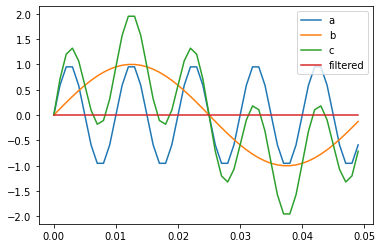

In [28]:
N_see = 50
plt.plot(t[:N_see], signala[:N_see], label='a')
plt.plot(t[:N_see], signalb[:N_see], label='b')
plt.plot(t[:N_see], signalc[:N_see], label='c')
plt.plot(t[:N_see], output[:N_see], label='filtered')
plt.legend()

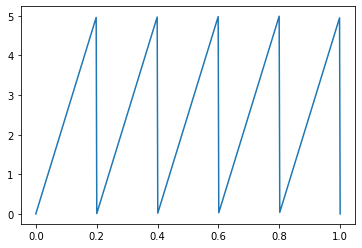

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
t = np.linspace(0, 1, 500)
plt.plot(t, 2.5*(signal.sawtooth(2 * np.pi * 5 * t) + 1))


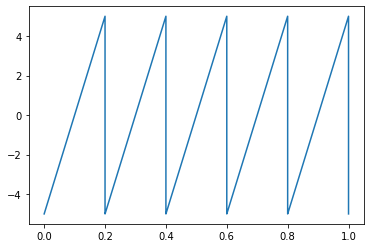

In [ ]:
# %ma
from scipy import signal
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.gridspec as gridspec

Fs = 1000000
f1 = 5  
timePoints = np.linspace(0, 1, Fs)
ramp = 5*signal.sawtooth(2 * np.pi * f1 * timePoints)

plt.plot(timePoints, ramp)
plt.show()

(-1.5, 1.5)

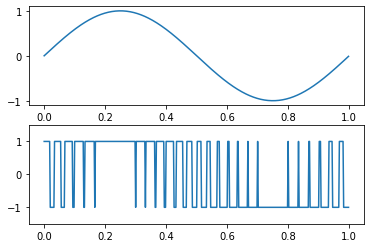

In [ ]:
plt.figure()
sig = np.sin(2 * np.pi * t)
pwm = signal.square(2 * np.pi * 30 * t, duty=(sig + 1)/2)
plt.subplot(2, 1, 1)
plt.plot(t, sig)
plt.subplot(2, 1, 2)
plt.plot(t, pwm)
plt.ylim(-1.5, 1.5)